# torch.nn
torch.nn是专门为深度学习而设计的模块。torch.nn的核心数据结构是Module，它是一个抽象概念，既可以表示神经网络中的某个层（layer），也可以表示一个包含很多层的神经网络。

在实际使用中，最常见的做法是继承nn.Module，撰写自己的网络/层。下面将书写一个线性层，尽管已经在nn模块中含有Linear（）了。

下面的例子我们把w和b封装成parameter。parameter是一种特殊的Tensor，但其默认需要求导（requires_grad = True）

In [24]:
import torch as t
from torch import nn

class Linear(nn.Module): # 继承nn.Module
    def __init__(self, in_features, out_features):
        super().__init__() # 等价于nn.Module.__init__(self)
        self.w = nn.Parameter(t.randn(in_features, out_features))
        self.b = nn.Parameter(t.randn(out_features))

    def forward(self, x):
        x = x.mm(self.w) # x.@(self.w)
        return x + self.b.expand_as(x)
layer = Linear(4,3)
input = t.randn(2,4)
output = layer(input)
output

tensor([[ 0.9905,  2.8138, -1.1164],
        [-0.7997,  0.8296, -2.2239]], grad_fn=<AddBackward0>)

# super()方法

super() 函数是用于调用父类(超类)的一个方法，用来解决多重继承问题的。

* Python 3 可以使用直接使用 super().xxx 代替 super(Class, self).xxx :

# 下面是一些常用的layer

## 操作相关
* 卷积、池化。这些层在实际使用中可分为一维(1D)、二维(2D)、三维（3D），池化方式又分为平均池化（AvgPool）、最大值池化（MaxPool）、自适应池化（AdaptiveAvgPool）等。

**卷积和池化都是向下取整**

[卷积操作可视化网址](https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md)

参数示范：self.conv2d = nn.Conv2d(in_channels=3,out_channels=64,kernel_size=4,stride=2,padding=1)
* BatchNorm：批规范化层，分为1D、2D和3D。除了标准的BatchNorm之外，还有在风格迁移中常用到的InstanceNorm层。
* Linear：全连接层
* Dropout：dropout层，用来防止过拟合，同样分为1D、2D和3D。

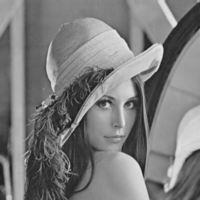

In [25]:
# 使用卷积块做图像锐化和池化（池化也可以看作一种特殊的卷积，用来下采样。但池化层没有可学习参数，其weight是固定的。）

from PIL import Image
from torchvision.transforms import ToTensor, ToPILImage
import matplotlib.pyplot as plt
to_tensor = ToTensor()
lena = Image.open('/content/drive/MyDrive/pytorch/认识nn/lena.png')
lena


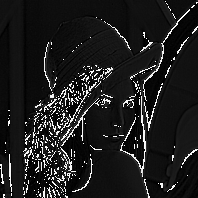

In [26]:
input = to_tensor(lena).unsqueeze(0)

#设置卷积核
kernel = t.ones(3,3)/-9
kernel[1][1] = 1
# 设置卷积层
# 卷积层的权重张量size为：output*input*kernel*kernel
conv = nn.Conv2d(1,1,3,bias=False)
conv.weight.data = kernel.view(1,1,3,3)
out = conv(input)
ToPILImage()(out.data.squeeze(0))

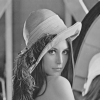

In [27]:
pool = nn.AvgPool2d(2,2)
out = pool(input)
ToPILImage()(out.data.squeeze(0))

torch.Size([1, 1, 100, 100])
torch.Size([1, 1, 200, 200])


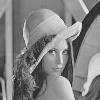

In [28]:
pool = nn.MaxPool2d(2,2)
out = pool(input)
print(out.size())
print(input.size())
ToPILImage()(out.data.squeeze(0))

* 全连接层
* BatchNorm：批规范化层,对一个批量内的样本进行归一化并且缩放与偏移（单特征进行，但矩阵操作），分为1D、2D和3D。除了标准的BatchNorm之外，还有在风格迁移中常用到的InstanceNorm层，transform中还用到了layernorm
* Dropout：dropout层，用来防止过拟合，同样分为1D、2D和3D。

想要查看模型参数可以使用state_dict()方法：一个PyTorch中的方法，用于返回模型的状态字典。该方法返回一个字典对象，其中包含了模型的所有可学习参数及其对应的张量值。这个字典的键是参数的名称，值是对应参数的张量。

In [29]:
# 全连接
linear=nn.Linear(5,2)
linear.state_dict()

OrderedDict([('weight',
              tensor([[ 0.2634,  0.0703, -0.2189,  0.0426, -0.0579],
                      [ 0.4364, -0.1666, -0.4435, -0.1835, -0.1961]])),
             ('bias', tensor([-0.3510, -0.4254]))])

In [30]:
# BatchNorm
#weight：缩放归一化后的数据的比例因子。默认值为1，即不对归一化后的数据进行缩放。
#bias：平移归一化后的数据的偏移量。默认值为0，即不对归一化后的数据进行平移。
#running_mean：在训练过程中跟踪每个特征的均值。初始值为0，然后在训练过程中逐渐更新。
#running_var：在训练过程中跟踪每个特征的方差。初始值为1，然后在训练过程中逐渐更新。
#num_batches_tracked：跟踪已经处理的小批量样本的数量。初始值为0，在每次更新参数时会递增。
h=t.randn(2, 4)
print(h)
bn = nn.BatchNorm1d(4)
print(bn.state_dict())
bn.weight.data = t.ones(4) * 4
bn.bias.data = t.zeros(4)
print(bn.state_dict())
bn_out = bn(h)
bn_out,bn_out.mean(0), bn_out.var(0, unbiased=False)

tensor([[ 1.1344,  0.6470, -1.4725,  0.1306],
        [-0.1413,  1.7027, -0.9053,  0.3659]])
OrderedDict([('weight', tensor([1., 1., 1., 1.])), ('bias', tensor([0., 0., 0., 0.])), ('running_mean', tensor([0., 0., 0., 0.])), ('running_var', tensor([1., 1., 1., 1.])), ('num_batches_tracked', tensor(0))])
OrderedDict([('weight', tensor([4., 4., 4., 4.])), ('bias', tensor([0., 0., 0., 0.])), ('running_mean', tensor([0., 0., 0., 0.])), ('running_var', tensor([1., 1., 1., 1.])), ('num_batches_tracked', tensor(0))])


(tensor([[ 4.0000, -3.9999, -3.9998, -3.9986],
         [-4.0000,  3.9999,  3.9998,  3.9986]],
        grad_fn=<NativeBatchNormBackward0>),
 tensor([ 0.0000e+00,  2.3842e-07, -1.1921e-07,  3.5763e-07],
        grad_fn=<MeanBackward1>),
 tensor([15.9996, 15.9994, 15.9980, 15.9885], grad_fn=<VarBackward0>))

In [31]:
#dropout
dropout = nn.Dropout(0.5)
o = dropout(bn_out)
print(o)
print(bn_out) # 有一半左右的数变为0

tensor([[7.9999, -0.0000, -0.0000, -0.0000],
        [-0.0000, 7.9999, 7.9995, 7.9971]], grad_fn=<MulBackward0>)
tensor([[ 4.0000, -3.9999, -3.9998, -3.9986],
        [-4.0000,  3.9999,  3.9998,  3.9986]],
       grad_fn=<NativeBatchNormBackward0>)


* 激活函数[官方文档](http://pytorch.org/docs/nn.html#non-linear-activations)

* Sequential：一个模型容器，它按顺序组织和堆叠多个层或模块，然后将输入数据依次传递给每个层或模块，并将输出作为下一层的输入。它允许用户以简洁的方式定义复杂的神经网络模型。

* ModuleList：一个用于存储模型的列表容器。它可以被用来定义一个包含多个子模块的模型。也可以用来简化forward函数的书写。

将每一层的输出直接作为下一层的输入，这种网络称为前馈传播网络（feedforward neural network）。

Sequential

In [32]:
relu = nn.ReLU(inplace=True)#nn.ReLU(inplace=True)表示使用原地操作（inplace operation）
#原地操作是指直接在原始张量上进行操作，而不创建新的张量。使用原地操作可以节省内存，并且可以更快地执行计算。
#当inplace参数设置为True时，ReLU函数将直接修改输入张量，并且不返回新的张量。
#如果inplace参数设置为False（默认值），则ReLU函数会创建并返回一个新的张量。
input = t.randn(2, 3)
print(input)
output = relu(input)
print(output) # 小于0的都被截断为0

tensor([[ 0.3654,  0.5241, -0.6178],
        [ 0.6597,  0.5390,  0.0911]])
tensor([[0.3654, 0.5241, 0.0000],
        [0.6597, 0.5390, 0.0911]])


In [33]:
# 面向函数编程
input = t.randn(2, 3)
print(input.data_ptr())
output = nn.functional.relu(input,inplace=True)
print(output,output.data_ptr())

98281277200192
tensor([[0.0000, 0.0000, 0.0000],
        [0.0000, 1.5888, 0.0000]]) 98281277200192


net1: Sequential(
  (conv): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
)


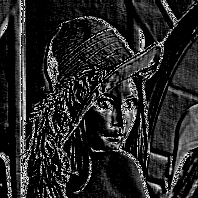

In [34]:
# Sequential的三种写法，一
net1 = nn.Sequential()
net1.add_module('conv',nn.Conv2d(1,1,3))
net1.add_module('batchnorm',nn.BatchNorm2d(1))
net1.add_module('relu',nn.ReLU())
input = to_tensor(lena).unsqueeze(0)
out=net1(input)
print('net1:', net1)
ToPILImage()(out.data.squeeze(0))


net2: Sequential(
  (0): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (1): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
)


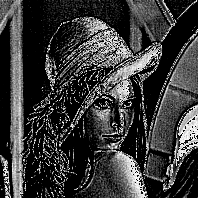

In [35]:
# 二
net2=nn.Sequential(
    conv,
    #nn.Conv2d(1,1,3),
    nn.BatchNorm2d(1),
    nn.ReLU()
)

out=net2(input)
print('net2:', net2)
ToPILImage()(out.data.squeeze(0))


net3: Sequential(
  (conv1): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
)


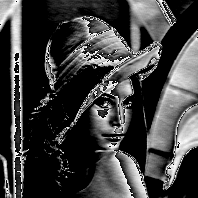

In [36]:
# 三
from collections import OrderedDict#一个有序字典
net3=nn.Sequential(
    OrderedDict([
        ('conv1',nn.Conv2d(1,1,3)),
        ('bn1',nn.BatchNorm2d(1)),
        ('relu',nn.ReLU())
    ])
)
out = net3(input)
print('net3:', net3)
ToPILImage()(out.data.squeeze(0))

In [37]:
# 可根据名字或序号取出子module
net1.conv, net2[0], net3.conv1

(Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1)),
 Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), bias=False),
 Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1)))

ModuleList

In [38]:
#可见，list中的子module并不能被主module所识别，而ModuleList中的子module能够被主module所识别。这意味着如果用list保存子module，将无法调整其参数，因其未加入到主module的参数中。
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.list = [nn.Linear(3, 4), nn.ReLU()]
        self.module_list = nn.ModuleList([nn.Conv2d(3, 3, 3), nn.ReLU()])
    def forward(self):
        pass
model = MyModule()
for name, param in model.named_parameters():
    print(name, param.size())
model

module_list.0.weight torch.Size([3, 3, 3, 3])
module_list.0.bias torch.Size([3])


MyModule(
  (module_list): ModuleList(
    (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
  )
)

* LSTM：还没看懂，先放这里

In [39]:
lstm = nn.LSTM(4,3,1)
print(lstm)

LSTM(4, 3)


* 损失函数

pytorch函数中也放在了nn.Moudle中的子类，可以通过面向对象的方式调用，也可以通过面向函数的方式调用

nn.functional.cross_entropy()填入的预测张量与标签张量之间第一维大小相同就可以。

可以自己书写损失函数，也可以封装在nn.Moudle中。

In [40]:
socre = t.randn(3,7)
label = t.Tensor([1,0,1]).long()
loss = nn.functional.cross_entropy(socre,label)
loss

tensor(2.9444)

In [41]:
loss1 = nn.CrossEntropyLoss()
loss = loss1(socre,label)
loss


tensor(2.9444)

* 优化器

PyTorch将深度学习中常用的优化方法全部封装在torch.optim中，其设计十分灵活，能够很方便的扩展成自定义的优化方法。所有的优化方法都是继承基类optim.Optimizer。


In [42]:
# 首先定义一个LeNet网络
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.features = nn.Sequential(
                    nn.Conv2d(3, 6, 5),
                    nn.ReLU(),
                    nn.MaxPool2d(2,2),
                    nn.Conv2d(6, 16, 5),
                    nn.ReLU(),
                    nn.MaxPool2d(2,2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 16 * 5 * 5)
        x = self.classifier(x)
        return x

net = Net()

In [43]:
from torch import  optim
optimizer = optim.SGD(params=net.parameters(), lr=1)
optimizer.zero_grad() # 梯度清零，等价于net.zero_grad()

input = t.randn(1, 3, 32, 32)
output = net(input)
output.backward(output) # fake backward

optimizer.step() # 执行优化
net.classifier

Sequential(
  (0): Linear(in_features=400, out_features=120, bias=True)
  (1): ReLU()
  (2): Linear(in_features=120, out_features=84, bias=True)
  (3): ReLU()
  (4): Linear(in_features=84, out_features=10, bias=True)
)

可以对不同学习层设置不同学习率

In [44]:
#（1）
# 对不同层设置不同学习率
optimizer =optim.SGD([
                {'params': net.features.parameters()}, # 学习率为1e-5
                {'params': net.classifier.parameters(), 'lr': 1e-2}
            ], lr=1e-5)
# 只为两个全连接层设置较大的学习率，其余层的学习率较小
special_layers = nn.ModuleList([net.classifier[0], net.classifier[4]])
special_layers_params = list(map(id, special_layers.parameters()))
base_params = filter(lambda p: id(p) not in special_layers_params,
                     net.parameters())

optimizer = t.optim.SGD([
            {'params': base_params},
            {'params': special_layers.parameters(), 'lr': 0.01}
        ], lr=1 )
# 调整学习率, 手动decay, 保存动量
for param_group in optimizer.param_groups:
    param_group['lr'] *= 0.1 # 学习率为之前的0.1倍
optimizer
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0

Parameter Group 1
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

* nn.functional

nn中还有一个很常用的模块：nn.functional，nn中的大多数layer，在functional中都有一个与之相对应的函数。

In [45]:
# 会用就行

* 初始化策略

PyTorch中nn.Module的模块参数都采取了较为合理的初始化策略，因此一般不用我们考虑，当然我们也可以用自定义初始化去代替系统的默认初始化。

而当我们在使用Parameter时，自定义初始化则尤为重要，因t.Tensor()返回的是内存中的随机数，很可能会有极大值，这在实际训练网络中会造成溢出或者梯度消失。PyTorch中nn.init模块就是专门为初始化而设计，如果某种初始化策略nn.init不提供，用户也可以自己直接初始化。

In [47]:
# nn.init初始化
from torch.nn import init
linear=nn.Linear(3,4)
#设置随机种子的函数
t.manual_seed(1)
#初始化
init.xavier_normal_(linear.weight)

Parameter containing:
tensor([[ 0.3535,  0.1427,  0.0330],
        [ 0.3321, -0.2416, -0.0888],
        [-0.8140,  0.2040, -0.5493],
        [-0.3010, -0.4769, -0.0311]], requires_grad=True)

In [48]:
# 直接初始化
import math
t.manual_seed(1)
std = math.sqrt(2)/math.sqrt(7.)
linear.weight.data.normal_(0,std)
#使用math.sqrt(2)/math.sqrt(7.)计算了一个标准差，这个标准差的计算公式是sqrt(2)/sqrt(7)，然后将其赋值给std变量。
#最后，调用linear.weight.data.normal_(0,std)来对线性层的权重参数进行初始化，使用正态分布来生成随机数，均值为0，标准差为std。

tensor([[ 0.3535,  0.1427,  0.0330],
        [ 0.3321, -0.2416, -0.0888],
        [-0.8140,  0.2040, -0.5493],
        [-0.3010, -0.4769, -0.0311]])

# nn.Moudle深度理解，参考书籍
以后用到了再补